<center><img src='Zomato-Logo-650x366.png' width='300'></center>

# <font color=red> Projeto 6 - Restaurantes em Bangalore
## <font color=red>Certificação em Dados Laboratória e IBM
### <font color=red>Análise do mercado de restaurantes em Bangalore, Karnataka, Índia
---

## <font color=red>Introdução

Bangalore, oficialmente Bengaluru, é a capital do estado indiano de Karnataka, no sudoeste da Índia. Conhecida por seus inúmeros parques, concentrações de lojas e, sobretudo, um paraíso gastronômico. Uma visita aos mercados movimentados da cidade será capaz de ativar todos os seus sentidos, entre cores, especiarias perfumadas, ingredientes exóticos e pratos icônicos como o _dosa_ - um lanche semelhante a uma panqueca amado pelos habitantes locais, o que não lhe faltará são opções de locais para saciar sua fome.

A Índia pode ser conhecida pelo chá, mas em Bangalore entre café e bares, uma ótima pedida são as cervejas artesanais, variadas e de ótima qualidade. Pela cidade é possível encontrar restaurantes especializados em pratos de diferentes lugares do mundo, para todos os gostos e orçamento. Dado que a concentração desse tipo de negócio varia de acordo com a zona da cidade, a tarefa de abrir um novo negócio nesse ramo pode ser um desafio a novos empreendedores ao competir com restaurantes já estabelecidos na área almejada.

Os dados do Zomato fornecem uma possibilidade de analisar a demografia gastronômica da zona urbana de Bangalore. Além de fornecer dados que possibilitam escolhas de negócios relacionadas à abertura de novos restaurantes, tais como locais potenciais para abertura de um novo empreendimento, seja voltado a uma cozinha específica, com base no preço médio cobrado na vizinhança, ou outra característica específica e determinante ao seu negócio. E, por fim, ainda fornece um perfil gastronômico dos bairros de Bangalore.

#### Objetivos do Aprendizado:

* Definir as questões de negócios relevantes;
* Definir os indicadores e visualizações de dados mais relevantes para sua análise;
* Entender o fluxo e as etapas de um processo de análise;
* Visualizar dados em uma ferramenta de Business Intelligence (BI);
* Limpar e processar dados;
* Preparar uma apresentação para as partes interessadas;
* Tome decisões de negócios com base em dados;



## <font color=red>Tratamento dos Dados

Importação de bibliotecas, banco de dados, conferência de tipos de dados em cada coluna e quantificação de campos nulos.

In [1]:
# Importação das bibliotecas utilizadas na análise

import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import folium
import re
import matplotlib.pyplot as plt
import plotly.express as px
from geopandas.tools import geocode
from shapely.geometry import Point
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from warnings import filterwarnings
from collections import Counter
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
filterwarnings('ignore')
%matplotlib inline

/tmp/ipykernel_5247/1817426649.py:18: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import InsetPosition


In [2]:
# Importação dos dados para a variável df:

df = pd.read_csv('zomato.csv')

In [3]:
# Visualização dos dados a partir das 5 primeiras e 5 últimas linhas do dataframe:

df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
# Obtendo informação sobre as colunas e o tipo de dado presentes em cada uma:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
# Número de linhas e colunas do dataframe:

print('Quantidade de linhas:', df.shape[0])
print('Quantidade de colunas:', df.shape[1])

Quantidade de linhas: 51717
Quantidade de colunas: 17


In [6]:
# Quantidade de dados nulos no dataframe:

df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

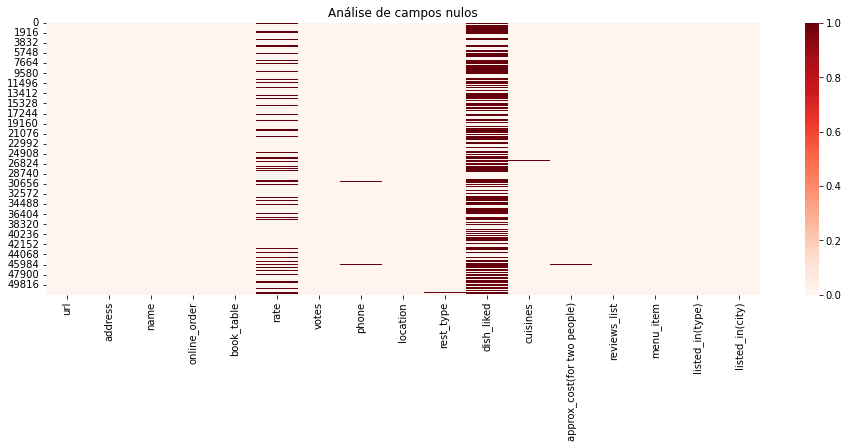

In [7]:
# Exibir graficamente as colunas com maior ausência de informações:

plt.figure( figsize=(16,5) )
plt.title('Análise de campos nulos')
sns.heatmap(df.isnull(), cmap="Reds");

Mais de 50% das linhas presentes na coluna _dish-liked_ estão vazias, por isso será excluída da análise. Assim, como as colunas _url, phone, reviews-list e menu-item_ por não apresentarem dados relevantes à minha análise.

In [8]:
df1 = df.drop(['url', 'phone', 'dish_liked', 'reviews_list', 'menu_item'] , axis=1)

In [9]:
# Renomear colunas para remoção de parênteses

df1 = df1.rename(columns={'approx_cost(for two people)':'cost_for_two_people','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost_for_two_people', 'type',
       'city'],
      dtype='object')

## <font color=red> **Análise Exploratória**

In [10]:
#Análise das notas únicas dadas aos restaurantes:

df1.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Quais as notas mais comuns atribuídas aos restaurantes da cidade? Qual a nota média e mediana do conjunto de dados?

Como vimos na contagem de campos nulos a avalição é um dos que apresenta maior número de dados ausentes, ou seja, existem reviews que não atribuem nota ao restaurante analisado. Por isso primeiro busquei entender como essa ausência de notas e/ou presença de informações em formato string, especialmente para restaurantes novos, estão configuradas neste dataframe. Após a conferência contabilizei a quantidade de votos para cada caso. Em seguida, fiz a escolha de atribuir a data 0 para o restaurantes definidos como _New_ e _-_. Para os campos completamentes nulos fiz novamente outra escolha, atribui a estes restaurantes a mediana das notas do conjunto, 3.7 (calculada a partir dos dados válidos).

In [11]:
# Verificar a quantidade de linhas com informações que não são notas (float):

print("Restaurantes novos: ", df[df['rate'] == 'NEW'].shape[0])
print("Restaurantes com dados nulos (NaN): ", df[df['rate'].isnull()].shape[0])
print("Restaurantes com -: ", df[df['rate'] == '-'].shape[0])

Restaurantes novos:  2208
Restaurantes com dados nulos (NaN):  7775
Restaurantes com -:  69


In [12]:
df1[df1['rate'] == '-']['votes'].unique()

array([0])

In [13]:
df1[df1['rate'].isnull()]['votes'].unique()

array([   0, 2497, 1251, 1137,  326,  285,  131,   16,  122,  283,  143,
         80,  167,  339,    6,    4,  475, 2508, 2464, 1240, 1221, 1168,
        149,  465, 1037,  265, 1313,  155,  350,  299,    5,   10,  132,
        257])

In [14]:
df1[df1['rate'] == 'NEW']['votes'].unique()

array([0])

In [15]:
df1['rate'].value_counts().sort_values(ascending=False)

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [16]:
# Criar uma variável que armazene uma cópia do dataframe original, mas que remova as linhas com avaliações nulas (NaN) e em formato de texto ('-', 'New'):

tmp_df = df1[~df1['rate'].isnull()]
tmp_df = tmp_df[(tmp_df['rate'] != "NEW") & (tmp_df['rate']!="-")]

<Figure size 720x360 with 0 Axes>

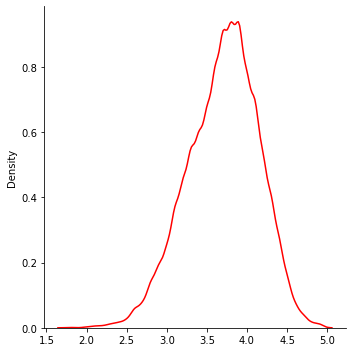

In [17]:
# A partir da variável criada acima irei verificar a dispersão das avaliações válidas:

tmp_df['rate'].value_counts().sort_values(ascending=False)
avaliacoes = tmp_df.rate.apply(lambda x:x.split('/')[0].strip())
avaliacoes = [float(x) for x in avaliacoes]
plt.figure(figsize = (10, 5))
sns.displot(avaliacoes, kind='kde', color='red')

In [18]:
#Exibir a nota média e mediana dada aos restaurantes:

media = np.mean(avaliacoes)
mediana = np.median(avaliacoes)
print(media, '|', mediana)

3.7004488179527177 | 3.7


In [19]:
# Exibir todas as notas únicas presentes no conjunto de dados:

df1.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
# Trocar as avaliações vazias pela nota média, substituir a categorização 'New' e '-' pela nota 0:

df1['rate'].fillna("3.7/5", inplace=True)
df1['rate'].replace("NEW", "0.0/5", inplace=True)
df1['rate'].replace("-", "0.0/5", inplace=True)

In [21]:
#Remover o '/5' das avaliações e exibir o resultado e quantificar restaurantes por nota:

rate_clean = lambda x: x.replace('/5', '') if type(x) == np.str else x
df1.rate = df1.rate.apply(rate_clean).str.strip().astype('float')
df1['rate'].value_counts().sort_values(ascending=False)

3.7    11596
3.9     3972
3.8     3873
3.6     3316
4.0     3183
4.1     2948
3.5     2784
3.4     2476
3.3     2310
0.0     2277
4.2     2184
3.2     1873
4.3     1693
3.1     1561
4.4     1147
3.0     1023
2.9      802
4.5      656
2.8      600
2.7      307
4.6      300
2.6      260
4.7      167
2.5      101
2.4       70
4.8       66
4.9       55
2.3       51
2.2       26
2.1       24
2.0       11
1.8        5
Name: rate, dtype: int64

Agrupei as avaliações por restaurante (franquias e matrizes foram considerados um único estabelecimento aqui) para contabilizar quantos restaurantes há para cada nota. 

In [22]:
print("Número de restaurantes avaliados com nota maior ou igual a 4: {}".format(df1.query("rate >= 4")['address'].nunique()))

Número de restaurantes avaliados com nota maior ou igual a 4: 2097


O custo de uma refeição por casal se encontrava no formato string. Para transformá-lo em formato float precisei antes excluir a virgula.

In [23]:
# Alterando o tipo da coluna 'cost_for_to_people' para float, mas antes substituí a vígula por ponto.

df1['cost_for_two_people'] = df1['cost_for_two_people'].astype(str)
df1['cost_for_two_people'] = df1['cost_for_two_people'].apply(lambda x: x.replace(',',''))
df1['cost_for_two_people'] = df1['cost_for_two_people'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              51717 non-null  object 
 1   name                 51717 non-null  object 
 2   online_order         51717 non-null  object 
 3   book_table           51717 non-null  object 
 4   rate                 51717 non-null  float64
 5   votes                51717 non-null  int64  
 6   location             51696 non-null  object 
 7   rest_type            51490 non-null  object 
 8   cuisines             51672 non-null  object 
 9   cost_for_two_people  51371 non-null  float64
 10  type                 51717 non-null  object 
 11  city                 51717 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.7+ MB


In [24]:
df1.describe()

,rate,votes,cost_for_two_people
count,51717.000000,51717.000000,51371.000000
mean,3.537458,283.697527,555.431566
std,0.855961,803.838853,438.850728
min,0.000000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,3.900000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


## <font color=red> Localidades que possuem maior número de avaliações

Esse dataframe fornece um total de 51.249 avaliações de pessoas usuárias a um total de 11.404 restaurantes da zona metropolitana de Bangalore. Para conhecer as localidades que abrigam os restaurantes mais famosos, ou populares, contabilei a quantidade de avaliações por localidade. Em seguida, contabilizei a porcentagem dessas avaliações por localidade, onde pude erceber que 27.94% das avaliações correspondem a reviews de restaurantes localizados em BTM Layout e Koramangala.

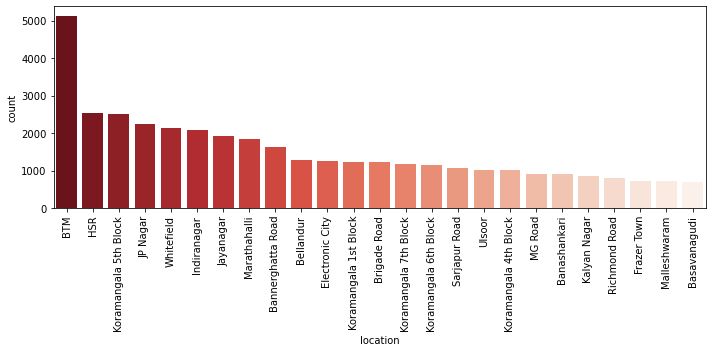

In [25]:
# Agrupar avaliações de restaurantes por localidade:

df1 = df1[~df1['location'].isnull()]
location_grp = df1.groupby(['location']).agg(['count'])['name'].reset_index()
location_grp.sort_values(by="count", inplace=True, ascending=False)
fig = plt.figure(figsize = (10, 5))  
sns.barplot(x="location", y="count", data=location_grp[:25], palette='Reds_r')
plt.xticks(rotation=90)
plt.tight_layout()

In [26]:
df1['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima

In [27]:
# Quantidade de restaurante por localidade:

print("Porcentagem de restaurante por localidades da zona metropolitana de Bengalore")
((df1['city'].value_counts() * 100 / df1.index.size).round(2))

Porcentagem de restaurante por localidades da zona metropolitana de Bengalore


BTM                      6.34
Koramangala 7th Block    5.68
Koramangala 5th Block    5.48
Koramangala 4th Block    5.37
Koramangala 6th Block    5.07
Jayanagar                4.59
JP Nagar                 4.05
Indiranagar              3.60
Church Street            3.53
MG Road                  3.50
Brigade Road             3.42
Lavelle Road             3.37
HSR                      3.37
Marathahalli             3.21
Residency Road           3.13
Whitefield               3.13
Bannerghatta Road        3.13
Brookefield              2.94
Old Airport Road         2.76
Kammanahalli             2.57
Kalyan Nagar             2.53
Basavanagudi             2.45
Sarjapur Road            2.44
Electronic City          2.38
Bellandur                2.37
Frazer Town              2.29
Malleshwaram             2.12
Rajajinagar              2.08
Banashankari             1.67
New BEL Road             1.43
Name: city, dtype: float64

### <font color=red> Análise dos tipos de restaurantes

Restaurantes que possuem o serviço de delivery são os que apresentam o maior número de reviews. No entanto cabe pontuar que o tipo delivery não é exclusivo, ou seja, vários restaurantes são delivery e outro. Ainda, podemos observar ainda com esta análise que os demais tipos mais recorrentes estão diretamente associados aos hábitos culturais locais, logo restaurantes especializados em jantares são os tipos mais recorrentes, seguidos de locais especializados em sobremesas. OBS: Na Índia o jantar é uma das refeições mais importantes e a mais completa do dia.

In [28]:
# Analisando os tipos mais comuns de empreendimentos

df1['type'].value_counts()

Delivery              25933
Dine-out              17772
Desserts               3593
Cafes                  1722
Drinks & nightlife     1101
Buffet                  878
Pubs and bars           697
Name: type, dtype: int64

Text(0.5, 1.0, 'Tipos de Restaurantes')

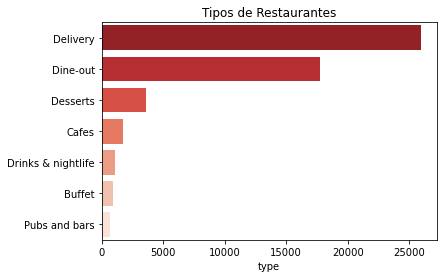

In [29]:
# Plotagem dos tipos de restaurantes mais recorrentes:

types = df1['type'].value_counts()
sns.barplot(x=types, y=types.index, palette='Reds_r')
plt.title("Tipos de Restaurantes")

Text(0.5, 1.0, 'Tipos de Culinária mais Recorrentes')

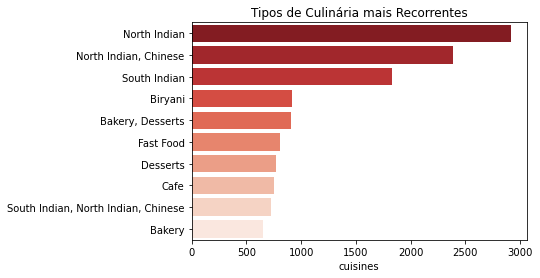

In [30]:
# Plotagem dos tipos de cozinha mais recorrente entre os restaurantes:

cuisines=df1['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index, palette='Reds_r')
plt.title("Tipos de Culinária mais Recorrentes")

In [31]:
text = df.cuisines[0]

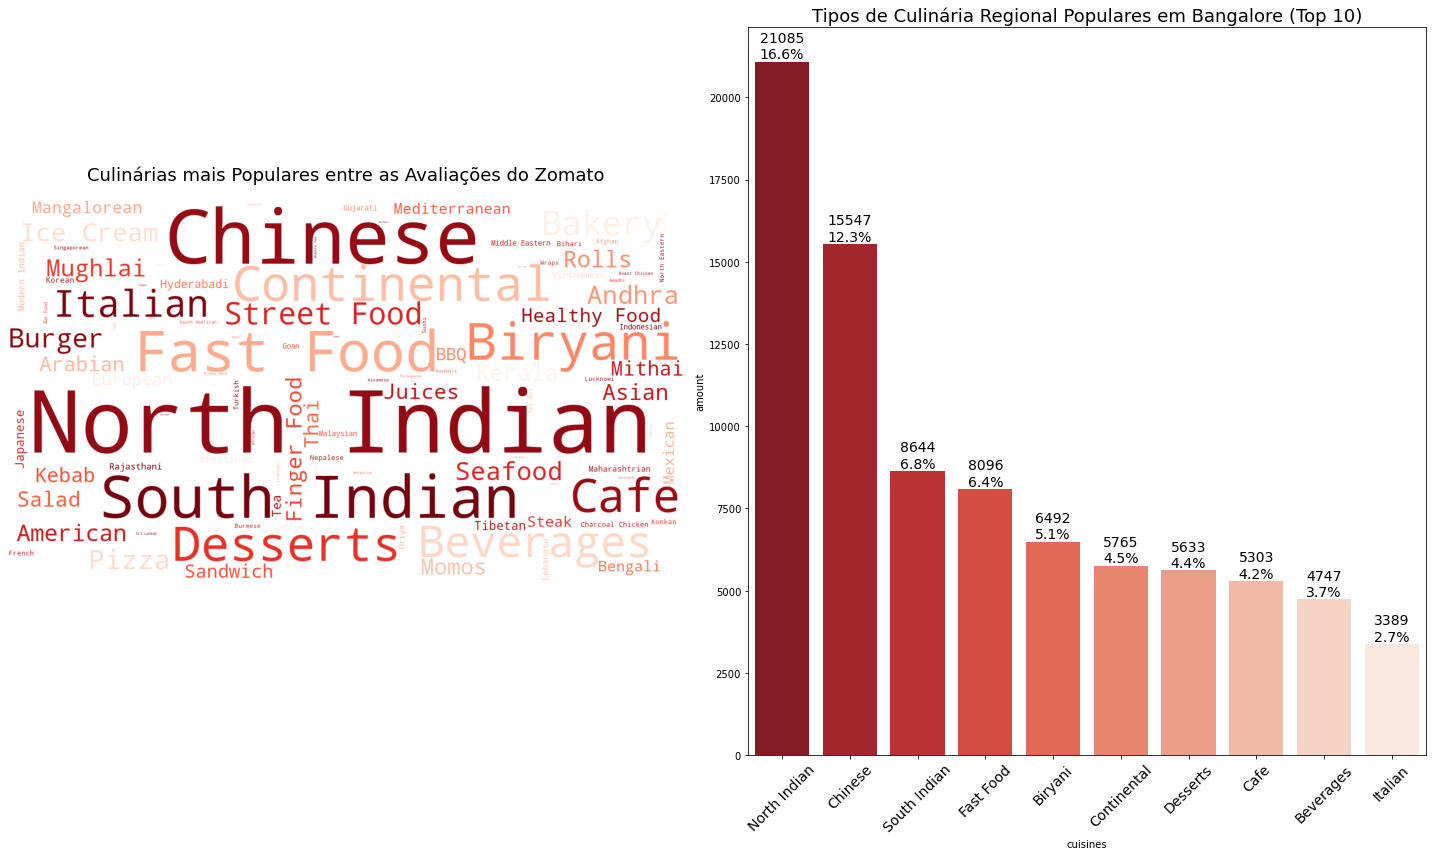

In [32]:
# Criar lista com as opções disponíveis
cuisines = list(df['cuisines'].astype(str).values)
cuisines_word_list = []
for lista in [c.split(',') for c in cuisines]:
    for word in lista:
        cuisines_word_list.append(word.strip())
        
# Criar contador para cada opção única e gerar uma nuvem de palavras
cuisines_wc_dict = Counter(cuisines_word_list)

wordcloud = WordCloud(width=1280, height=720, collocations=False, random_state=42, 
                      colormap='Reds_r', background_color='white').generate_from_frequencies(cuisines_wc_dict)

# Visualização da nuvem de palavras e o total de cada tipo de culinária
fig, axs = plt.subplots(1, 2, figsize=(20, 12))
ax1 = axs[0]
ax2 = axs[1]
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Culinárias mais Populares entre as Avaliações do Zomato', size=18, pad=20)

# Total para cada tipo de culinária
df_cuisines = pd.DataFrame()
df_cuisines['cuisines'] = cuisines_wc_dict.keys()
df_cuisines['amount'] = cuisines_wc_dict.values()
df_cuisines.sort_values(by='amount', ascending=False, inplace=True)
sns.barplot(x='cuisines', y='amount', data=df_cuisines.head(10), palette='Reds_r', ax=ax2)
ax2.set_title('Tipos de Culinária Regional Populares em Bangalore (Top 10)', size=18)

# Customização do gráfico
ncount = df_cuisines['amount'].sum()
x_ticks = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels(x_ticks, rotation=45, fontsize=14)
for p in ax2.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax2.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), fontsize=14, ha='center', va='bottom')

plt.tight_layout()
plt.show()

Restaurantes que oferecem pratos da culinária do Norte da Índia, incluindo a Mughlai, e a culinária chinesa são os que possuem maior número de avaliações.

#### <font color=red> Georreferenciamento dos dados

Nessa etapa georreferenciei as localidades para entender a espacialização desses restaurantes por localidade. O nome das localidades passou por um tratamento para remover letras maiúsculas e sufixos de subdivisão (location_group). Com isso, agrupei todos os segmentos de uma localidade. Por exemplo Koramangala (uma vizinhança residencial que teve início no entorno da rodovia que liga a região central de Bengalore à Eletronic City) que neste dataframe encontra-se subdividida em 8 segmentos e na variável *location_group* será entendida como uma única localidade e, para tal fim, agrupei todas as suas partes, que passou a ser denominada apenas por koramangala. O mesmo ocorreu para outras localidades que apresentam característica similar.

In [33]:
from geopy.geocoders import Nominatim
from tqdm import tqdm 
from folium import plugins

In [34]:
# Georreferenciando as localidades, pois esse mesmo método não funcionou com os endereços, onde a grande maioria retorna erro:

i = 0

def findGeocode(city):  
    try:
        geolocator = Nominatim(user_agent="my_agent") 
        loc = geolocator.geocode(city)
        return loc
    except GeocoderTimedOut:
        i += 1
        if i == 5:
            return None
        return findGeocode(city)   

In [35]:
# Localização por localidade:

location_lat_long = {}
locations_unq = df1.location.unique()
for loc in locations_unq:
    loc = loc + ", Bangalore"
    location = findGeocode(loc)
    if location is None:
        print("Não encontrado... ", loc)
        continue
    lat = location.latitude
    long = location.longitude
    location_lat_long[loc] = [lat, long]
    print("Salvo.. ", loc)

Salvo..  Banashankari, Bangalore
Salvo..  Basavanagudi, Bangalore
Salvo..  Mysore Road, Bangalore
Salvo..  Jayanagar, Bangalore
Salvo..  Kumaraswamy Layout, Bangalore
Salvo..  Rajarajeshwari Nagar, Bangalore
Salvo..  Vijay Nagar, Bangalore
Salvo..  Uttarahalli, Bangalore
Salvo..  JP Nagar, Bangalore
Salvo..  South Bangalore, Bangalore
Salvo..  City Market, Bangalore
Salvo..  Nagarbhavi, Bangalore
Salvo..  Bannerghatta Road, Bangalore
Salvo..  BTM, Bangalore
Salvo..  Kanakapura Road, Bangalore
Salvo..  Bommanahalli, Bangalore
Salvo..  CV Raman Nagar, Bangalore
Salvo..  Electronic City, Bangalore
Salvo..  HSR, Bangalore
Salvo..  Marathahalli, Bangalore
Salvo..  Sarjapur Road, Bangalore
Salvo..  Wilson Garden, Bangalore
Salvo..  Shanti Nagar, Bangalore
Salvo..  Koramangala 5th Block, Bangalore
Salvo..  Koramangala 8th Block, Bangalore
Salvo..  Richmond Road, Bangalore
Salvo..  Koramangala 7th Block, Bangalore
Salvo..  Jalahalli, Bangalore
Salvo..  Koramangala 4th Block, Bangalore
Salvo.. 

In [36]:
df2 = df1[(df1['location']!="St. Marks Road") & (df1['location']!="Rammurthy Nagar") & (df1['location']!="Sadashiv Nagar")]

In [37]:
df2

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two_people,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield


In [38]:
# Dispor os dados de geolocalização no mapa, indicando a concentração de restaurantes por localidade:

heatmap_df = []
for indx, row in tqdm(df2.iterrows(), total=len(df2)):
    if row['location']+", Bangalore" in location_lat_long:
        df2.loc[indx, 'latitude'] = location_lat_long[row['location']+", Bangalore"][0]
        df2.loc[indx, 'longitude'] = location_lat_long[row['location']+", Bangalore"][1]
        heatmap_df.append([location_lat_long[row['location']+", Bangalore"][0], location_lat_long[row['location']+", Bangalore"][1]])

100%|█████████████████████████████████████████████████████████████████████████████████████████| 51249/51249 [00:16<00:00, 3088.89it/s]


In [39]:
bengaluru = folium.Map(location=[12.972442, 77.580643], tiles='cartodbpositron', zoom_start=12.3)

In [40]:
plugins.HeatMap(heatmap_df).add_to(bengaluru)

In [41]:
bengaluru

#### Franquias mais populares em Bangalore
Muitos restaurantes possuem franquias espalhadas pela cidade, fato observado a partir da repetição de um mesmo nome de restaurante com endereços diferentes. Abaixo listo as **10 redes de restaurantes** mais populares da cidade.

In [42]:
franchises = df2.groupby(by='name', as_index=False).agg({'votes': 'sum', 'address': 'count', 'cost_for_two_people': 'mean', 'rate': 'mean'})
franchises.columns = ['Restaurante', 'Votos', 'Unidades', 'CustoCasal', 'Nota']
franchises['VotosUnidades'] = franchises['Votos'] / franchises['Unidades']
franchises = franchises.sort_values(by='Unidades', ascending=False)
franchises = franchises.loc[:, ['Restaurante', 'Unidades', 'Votos', 'VotosUnidades',
                                                'CustoCasal', 'Nota']]

franchises.head(10).style.format({'CustoCasal':'₹{0:,.2f}'})

,Restaurante,Unidades,Votos,VotosUnidades,CustoCasal,Nota
1315,Cafe Coffee Day,96,3089,32.177083,₹844.79,3.187500
5520,Onesta,85,347520,4088.470588,₹600.00,4.410588
3768,Just Bake,73,2898,39.698630,₹400.00,3.379452
2435,Empire Restaurant,71,229808,3236.732394,₹685.21,3.916901
2566,Five Star Chicken,70,3134,44.771429,₹257.86,3.432857
3935,Kanti Sweets,68,7336,107.882353,₹400.00,3.898529
5757,Petoo,66,4242,64.272727,₹659.85,3.596970
5807,Polar Bear,65,8121,124.938462,₹361.54,3.824615
823,Baskin Robbins,64,2487,38.859375,₹251.56,3.518750
1649,Chef Baker's,62,5073,81.822581,₹516.07,3.622581


In [43]:
''' Remover números e indicadores de números ordinais da nomenclatura das localidades (esse fator irá agrupar localidades antes tidas 
como distintas, tais como koramangala por exemplo:'''

df2['location_group'] = df2.location.apply(lambda x:re.sub("[0-9]+(st|th|nd|rd) block", "", x.lower()).strip())

### <font color=red> Localidades que possuem a maior quantidade de restaurantes com notas altas

Nesta etapa agrupei os restaurantes por localidade e em seguida selecionei as 10 localidade que possuem a maior nota média, ou seja, abrigam muitos restaurantes com avaliações boas ou excelentes (acima de 3.7).

In [44]:
loc_better_rate = df2.groupby(['location_group'], as_index=False).agg({'votes': 'sum', 'name': 'count', 'cost_for_two_people': 'mean', 'rate': 'mean'})
loc_better_rate.columns = ['Localidade', 'Votos', 'Unidades', 'Custo_Casal', 'Nota']
loc_better_rate = loc_better_rate.sort_values(['Nota', 'Unidades'], ascending=False)
loc_better_rate = loc_better_rate.loc[:, ['Localidade', 'Unidades', 'Votos', 'Custo_Casal', 'Nota']]

loc_better_rate.head(10).style.format({'Custo_Casal':'₹{0:,.2f}'})

,Localidade,Unidades,Votos,Custo_Casal,Nota
43,lavelle road,529,506186,"₹1,307.93",4.023440
65,sankey road,27,6411,"₹2,505.56",3.955556
11,church street,569,594979,₹834.89,3.954306
14,cunningham road,491,287873,₹864.97,3.894501
59,rajarajeshwari nagar,2,732,₹725.00,3.850000
60,residency road,675,291954,₹966.32,3.830222
42,langford town,27,5281,₹883.33,3.807407
27,infantry road,151,51555,"₹1,062.25",3.789404
48,mg road,918,432111,"₹1,155.70",3.736928
57,race course road,139,27485,"₹1,309.35",3.726619


As localidades de **Lavelle Road** e **Church Street** são as localidades com o maior número de restaurantes com notas excelentes, o que mantém a nota média do bairro bastante alta também. Residency Road vem logo em seguida com uma quantidade expressiva de restaurantes. Porém fiz uma comparação entre os valores dos restaurantes das duas principais para verificar se há alguma correlação entre notas altas e valor da refeição.

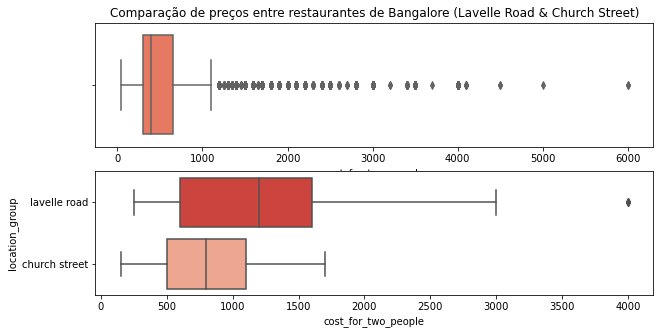

In [45]:
# Análise dos restaurantes com maior tarifa nas localidades Lavelle Road e Church Street:

lavelle_church = df2[(df2['location_group'] == 'lavelle road') | (df2['location_group'] == 'church street')]
fig = plt.figure(figsize = (10, 5))
ax1 = plt.subplot(2,1,1)
plt.title('Comparação de preços entre restaurantes de Bangalore (Lavelle Road & Church Street)')
sns.boxplot(x="cost_for_two_people", data=df2, ax=ax1, palette='Reds_r')
ax2 = plt.subplot(2,1,2)
sns.boxplot(x="cost_for_two_people", y="location_group", data=lavelle_church, ax=ax2, palette='Reds_r')
plt.show()

Os restaurantes de Church Street possuem valores bastante próximos a média de valor por toda Bangalore, que varia entre 40.0 e 1000 rúpias. Já Lavelle Road apresenta valores bem mais elevados que a média da cidade. Porém, há outras localidades que concentram restaurantes de tarifas mais elevadas, segundo o gráfico abaixo, que demonstra que os restaurantes com tarifa mais elevada estão nas localidades de Sankey Road, Old Airport Road e Residency Road.

<AxesSubplot:xlabel='cost_for_two_people', ylabel='location_group'>

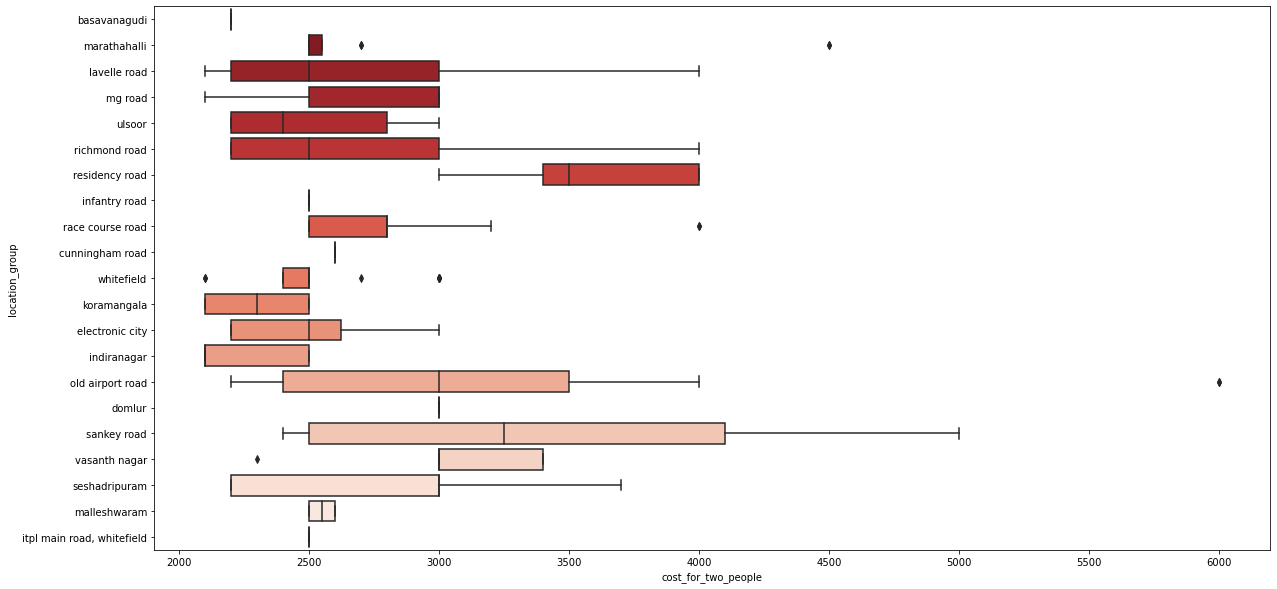

In [46]:
# Onde estão localizados os restaurantes com o valor mais alto? Para isso a análise foi direcionada apenas as localidades onde o custo da refeição 
# para duas pessoas é maior que 2000:

fig = plt.figure(figsize = (20, 10))
expensive_restaurants = df2[df2.cost_for_two_people > 2000]
sns.boxplot(x='cost_for_two_people', y='location_group', data=expensive_restaurants, palette='Reds_r')

### <font color=red> Quais os tipos de restaurantes mais recorrentes nas localidades que possuem tarifa mais elevada?

Os restaurantes associados ao jantar prevalecem, no entando percebemos uma presença de opções mais requintadas como fine dining

Text(0.5, 0, 'Nº de restaurantes na residency road')

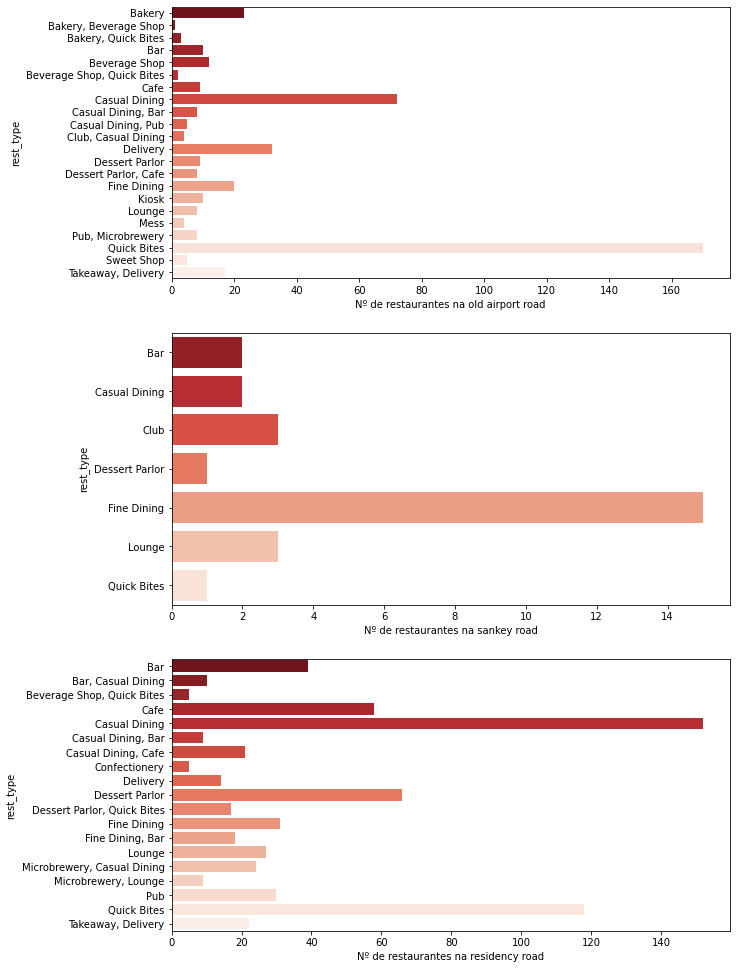

In [47]:
# Análise das localidades que concentram o maior número de restaurantes caros, sankey road, old airport road e residency road

super_expensive_res = df2[(df2['location_group'] == 'sankey road') | (df2['location_group'] == 'old airport road') | (df2['location_group'] == 'residency road')]
super_expensive_res = super_expensive_res.groupby(['location_group', 'rest_type']).agg({'name':'count'}).reset_index()
super_expensive_res.rename(columns={'name':'count'}, inplace=True)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10, 17))
sns.barplot(data=super_expensive_res[super_expensive_res.location_group=='old airport road'], x='count', y='rest_type', ax=ax[0], palette='Reds_r')
ax[0].set_xlabel('Nº de restaurantes na old airport road')
sns.barplot(data=super_expensive_res[super_expensive_res.location_group=='sankey road'], x='count', y='rest_type', ax=ax[1], palette='Reds_r')
ax[1].set_xlabel('Nº de restaurantes na sankey road')
sns.barplot(data=super_expensive_res[super_expensive_res.location_group=='residency road'], x='count', y='rest_type', ax=ax[2], palette='Reds_r')
ax[2].set_xlabel('Nº de restaurantes na residency road')

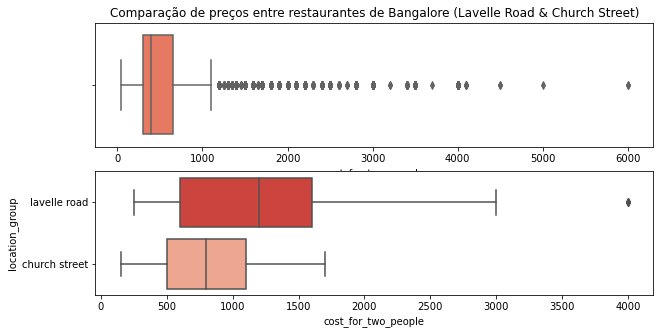

In [48]:
# Comparação de variação de valores da refeição em Bangalore e entre as localidades Lavelle Road & Church Street

lavelle_church = df2[(df2['location_group'] == 'lavelle road') | (df2['location_group'] == 'church street')]
fig = plt.figure(figsize = (10, 5))
ax1 = plt.subplot(2,1,1)
plt.title('Comparação de preços entre restaurantes de Bangalore (Lavelle Road & Church Street)')
sns.boxplot(x='cost_for_two_people', data=df2, ax=ax1, palette='Reds_r')
ax2 = plt.subplot(2,1,2)
sns.boxplot(x='cost_for_two_people', y='location_group', data=lavelle_church, ax=ax2, palette='Reds_r')
plt.show()

In [49]:
restaurant_loc = df2['location_group'].value_counts()
restaurant_loc

koramangala             7782
btm                     5124
hsr                     2523
jp nagar                2235
whitefield              2144
                        ... 
west bangalore             6
yelahanka                  6
jakkur                     3
rajarajeshwari nagar       2
peenya                     1
Name: location_group, Length: 82, dtype: int64

In [50]:
restaurant_loc.sum()

51249

In [51]:
df2.to_csv('zomato_clear.csv')

## <font color='red'> Lista de perguntas ao dataframe:

### Qual a dispersão espacial desses restaurantes? Em qual lugar temos uma maior concentração?
    
Os restaurantes estão localizados por toda a mancha urbana da região metropolitanda, mas as localidades de Koramangala e BTM Layout são as que concentram o maior número de restaurantes, com 27,94% do total.
    
### Onde concentram-se os restaurantes com melhor avaliação? Isso tem relação com a localização geográfica?

Sobretudo em Lavelle Road, Church Street e Residency Road.
    
### Quais locais concentram os restaurantes com maior tarifa?

Sankey Road, Old Airport Road e Residency Road.
    

In [53]:
!jupyter nbconvert --to html Projeto6_Zomato_AnaliseExploratoria.ipynb

[NbConvertApp] Converting notebook Projeto6_Zomato_AnaliseExploratoria.ipynb to html
[NbConvertApp] Writing 2744798 bytes to Projeto6_Zomato_AnaliseExploratoria.html
